#Load packages:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Random matrices

Limit distribution of a GUE random matrix (semicircle distribution):

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


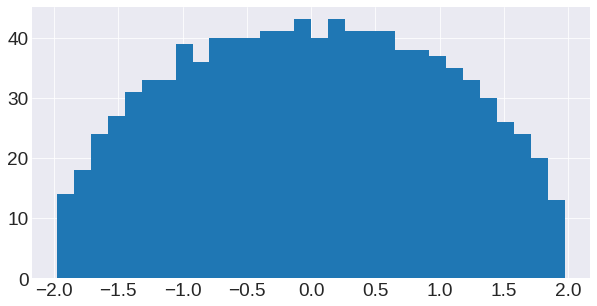

(-0.0009467910849386247+0j)
(0.9991962873734755+0j)


In [0]:
N = 1000
matrix = np.zeros([N,N], dtype=complex)


for k in range(0, N):
    matrix[k,k]= np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))

for k in range(0, N):
  for j in range(0, N):
    if j < k:
        ww = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        p  = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        matrix[j,k]= ww + 1j *p
        matrix[k,j] = ww - 1j *p

[eig_val, eig_vec] = np.linalg.eig(matrix)

plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

axs.hist(eig_val, bins=30, range=None, density=False)
plt.show()

print(np.trace(matrix)/N)
print(np.trace(np.matmul(matrix,matrix))/N)


Matrix $AR(1)$ process $$X_0=I \quad \text{and} \quad X_n = 0.5 X_{n-1} + \varepsilon_n,$$ where  $(\varepsilon_n)$ are independent GUE random matrices.

0
10
20
30
40
50
60
70
80
90


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


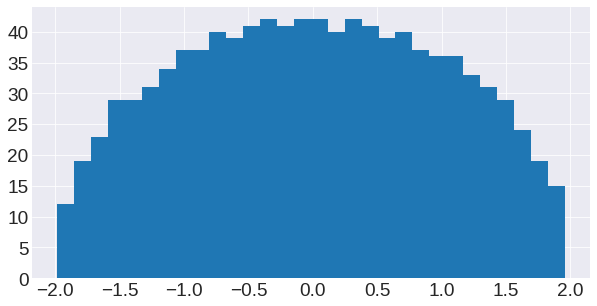

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


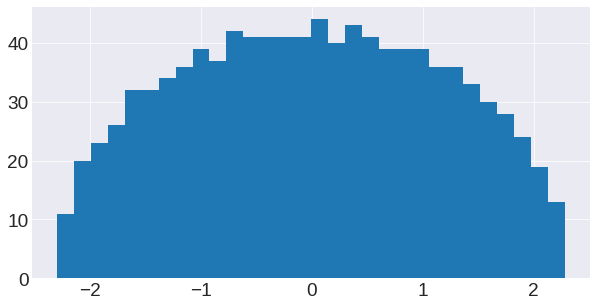

(0.00020241589699768436+0j)
(1.3345056142515683+0j)


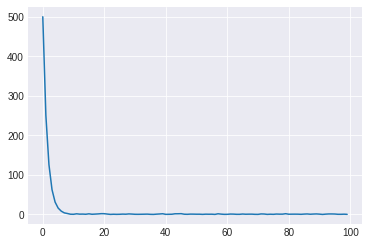

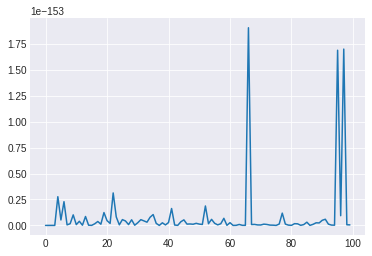

Tests: 
Tr(X)/N: (0.0006094454582606287+0j)
Tr(Y)/N: (-0.00010230683213263003+0j)
Tr(XYXY)/N (should be close to 0 if freely independent and both have mean 0): (0.0021211204407168556+3.0531133177191803e-19j)
Tr(XX)/N*Tr(YY)/N: (1.333650181623528+0j)
Tr(XX)/N: (1.3329545454885081+0j)
Tr(YY)/N: (1.0005218753612974+0j)


In [0]:
def plot_eig(M):
  [eig_val, eig_vec] = np.linalg.eig(M)
  plt.style.use('seaborn-darkgrid')
  fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
  plt.xticks(fontsize=19)
  plt.yticks(fontsize=19)
  axs.hist(eig_val, bins=30, range=None, density=False)
  plt.show()

N = 1000 # dimension of the matrices
m = 100  # number of matrices
series = np.zeros([N,N], dtype=complex)
matrix = np.zeros([N,N], dtype=complex)
test_X = np.zeros([N,N], dtype=complex)
test_Y = np.zeros([N,N], dtype=complex)
#tr_values = np.zeros([m], dtype=complex)
#det_values = np.zeros([m], dtype=complex)
tr_values = np.zeros([m])
det_values = np.zeros([m])

for k in range(0,N):
  series[k,k] = 1


for kkk in range(0,m):
  matrix = np.zeros([N,N], dtype=complex)
  for k in range(0, N):
    matrix[k,k]= np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
  for k in range(0, N):
    for j in range(0, N):
      if j < k:
        ww = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        p  = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        matrix[j,k]= ww + 1j *p
        matrix[k,j] = ww - 1j *p
  series =  0.5 * series + matrix
  tr_values[kkk] = np.abs(np.trace(series))
  det_values[kkk] = np.abs(np.linalg.det(series))  

  if kkk == m-2:
    test_X = series 
  if kkk == m-1:
    test_Y = matrix 
  if np.mod(kkk,10) == 0:
    print(kkk)

plot_eig(matrix)
plot_eig(series)

print(np.trace(series)/N)
print(np.trace(np.matmul(series,series))/N)

plt.plot(tr_values)
plt.show()
plt.plot(det_values)
plt.show()

print("Tests: ")
print("Tr(X)/N: " + str(np.trace(test_X)/N))
print("Tr(Y)/N: " + str(np.trace(test_Y)/N))
mul = np.matmul(test_X,test_Y)
mul = np.matmul(mul,mul)
print("Tr(XYXY)/N (should be close to 0 if freely independent and both have mean 0): " + str(np.trace(mul)/N))
print("Tr(XX)/N*Tr(YY)/N: " + str( np.trace(np.matmul(test_X,test_X))/N * np.trace(np.matmul(test_Y,test_Y))/N))
print("Tr(XX)/N: " + str( np.trace(np.matmul(test_X,test_X))/N ))
print("Tr(YY)/N: " + str( np.trace(np.matmul(test_Y,test_Y))/N ))

We change our model to ``squared GUE noise''
$$X_0=I \quad \text{and} \quad X_n = 0.5 X_{n-1} + (\varepsilon_n^2-\varphi(\varepsilon_n^2)).$$

0
10
20
30
40
50
60
70
80
90


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


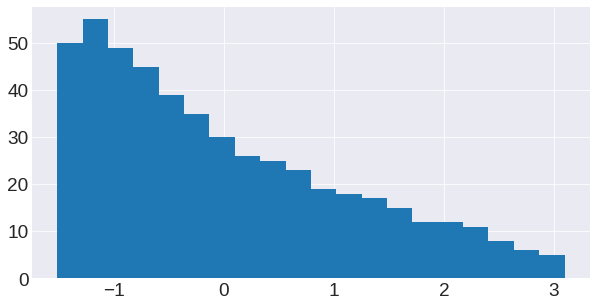

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


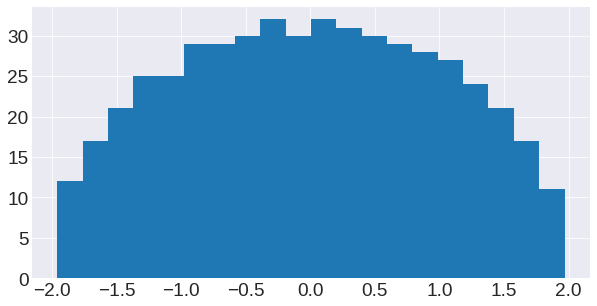

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


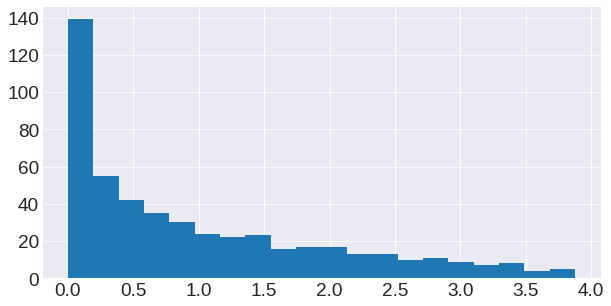

(-2.7755575615628914e-19+0j)
(1.3259683095943997+0j)


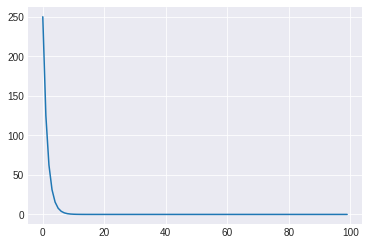

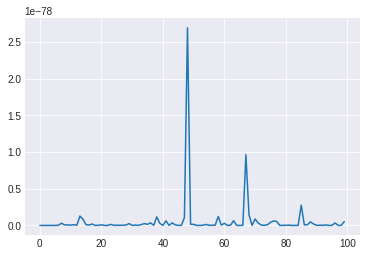

Test: 
Tr(X)/N: (-1.3444800828210647e-16+0j)
Tr(Y)/N: (6.616929226765933e-17+0j)
Tr(XYXY)/N: (-0.004283653714062586+2.6645352591003758e-18j)
Tr(XX)/N*Tr(YY)/N: (1.3163385035173347+0j)
Tr(XX)/N: (1.32020781071238+0j)
Tr(YY)/N: (0.9970691680782002+0j)


In [0]:
def plot_eig(M, bins=20):
  [eig_val, eig_vec] = np.linalg.eig(M)
 # heights_75[k] = (np.sort(heights[k,:])[int(0.5*nstudents)])
  plt.style.use('seaborn-darkgrid')
  fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
  plt.xticks(fontsize=19)
  plt.yticks(fontsize=19)
  axs.hist(eig_val, bins=bins, range=None, density=False)
  plt.show()

N = 500
m = 100
series = np.zeros([N,N], dtype=complex)
matrix = np.zeros([N,N], dtype=complex)
test_X = np.zeros([N,N], dtype=complex)
test_X2= np.zeros([N,N], dtype=complex)
test_Y = np.zeros([N,N], dtype=complex)
#tr_values = np.zeros([m], dtype=complex)
#det_values = np.zeros([m], dtype=complex)
tr_values = np.zeros([m])
tr_values_re = np.zeros([m])
tr_values_im = np.zeros([m])
det_values = np.zeros([m])

corr = np.zeros([N,N], dtype=complex)

for k in range(0,N):
  series[k,k] = 1
  if k < int(N/2): 
    corr[k,k] = 0.5
  else:
    corr[k,k] = 0.5

for kkk in range(0,m):
  matrix = np.zeros([N,N], dtype=complex)
  for k in range(0, N):
    matrix[k,k]= np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
  for k in range(0, N):
    for j in range(0, N):
      if j < k:
        ww = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        p  = np.random.normal(loc=0, scale=1/(np.sqrt(2*N)))
        matrix[j,k]= ww + 1j *p
        matrix[k,j] = ww - 1j *p
  GUEsq = np.matmul(matrix,matrix)
  aaaaa = np.trace(GUEsq)/N
  for j in range(0,N):
      GUEsq[j,j]  = GUEsq[j,j] - aaaaa
  series =  np.matmul(corr, series) + GUEsq
  tr_values[kkk] = np.abs(np.trace(series))
  tr_values_re[kkk] = np.real(np.trace(series)/N)
  tr_values_im[kkk] = np.imag(np.trace(series)/N)
  det_values[kkk] = np.abs(np.linalg.det(series))  
  if kkk == m-2:
    test_X = series 
  if kkk == m-1:
    test_Y = GUEsq
  if np.mod(kkk,10) == 0:
    print(kkk)


plot_eig(series)
plot_eig(matrix)
plot_eig(np.matmul(matrix, matrix))

print(np.trace(series)/N)
print(np.trace(np.matmul(series,series))/N)

plt.plot(tr_values)
plt.show()
plt.plot(det_values)
plt.show()

print("Test: ")
print("Tr(X)/N: " + str(np.trace(test_X)/N))
print("Tr(Y)/N: " + str(np.trace(test_Y)/N))
mul = np.matmul(test_X,test_Y)
mul = np.matmul(mul,mul)
print("Tr(XYXY)/N: " + str(np.trace(mul)/N))
print("Tr(XX)/N*Tr(YY)/N: " + str( np.trace(np.matmul(test_X,test_X))/N * np.trace(np.matmul(test_Y,test_Y))/N))
print("Tr(XX)/N: " + str( np.trace(np.matmul(test_X,test_X))/N ))
print("Tr(YY)/N: " + str( np.trace(np.matmul(test_Y,test_Y))/N ))